In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
## loading csv data 

lending_df = pd.read_csv('loan.csv')
lending_df.head()

D:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
## Checking data availability

lending_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [4]:
## Loan Status distribution

lending_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Data Cleaning

In [5]:
## Remove empty columns 

lending_df = lending_df.dropna(axis=1, how='all')
lending_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [6]:
lending_df.shape

(39717, 57)

In [7]:
## Calculating Percentage of missing values in each column

100*lending_df.isna().sum()/len(lending_df.index)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [8]:
## Removing columns with 30% or more missing data

lending_df_mno_high = (100*lending_df.isna().sum()/len(lending_df.index) > 30)
lending_df = lending_df.drop(lending_df_mno_high[lending_df_mno_high].index, axis=1)
# lending_df = lending_df.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)

In [9]:
## Unique values count for each categorical column

lending_df.select_dtypes(include='object').nunique()

term                       2
int_rate                 371
grade                      7
sub_grade                 35
emp_title              28820
emp_length                11
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
pymnt_plan                 1
url                    39717
purpose                   14
title                  19615
zip_code                 823
addr_state                50
earliest_cr_line         526
revol_util              1089
initial_list_status        1
last_pymnt_d             101
last_credit_pull_d       106
application_type           1
dtype: int64

In [10]:
## Remove object(categorical data) columns with unique values greater than 25000 as it will be hard to get insights from it
## Remove object(categorical data) columns with 1 unique value due to 0 variance

lending_df = lending_df.drop(['emp_title', 'url'], axis=1)
lending_df = lending_df.drop(['pymnt_plan', 'initial_list_status', 'application_type'], axis=1)

In [11]:
## Unique values count for each int/float datatype column

lending_df.select_dtypes(include=['float64', 'int64']).nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
installment                   15383
annual_inc                     5318
dti                            2868
delinq_2yrs                      11
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
total_acc                        82
out_prncp                      1137
out_prncp_inv                  1138
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_prncp                7976
total_rec_int                 35148
total_rec_late_fee             1356
recoveries                     4040
collection_recovery_fee        2616
last_pymnt_amnt               34930
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths    

In [12]:
## Remove columns with 1 unique value due to 0 variance
## Remove columns with all unique random values as loan status will be independent of these columns

lending_df = lending_df.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
                'tax_liens'], axis=1)
lending_df = lending_df.drop(['id', 'member_id'], axis=1)

In [13]:
## Dropping 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
## 'last_pymnt_d','funded_amnt', 'funded_amnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
## 'last_pymnt_amnt', 'issue_d' as they are leaking data from the future 
## Columns which will be filled once Lending Club accepts the loan are defined as leaking columns since we won't have that info
## when we are choosing whether to give loan or not

lending_df = lending_df.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                             'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                             'last_pymnt_amnt', 'last_pymnt_d', 'funded_amnt', 'funded_amnt_inv', 'issue_d'], axis=1)

In [14]:
lending_df.shape

(39717, 26)

In [15]:
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
## Missing value count for each column in lending_df dataframe

lending_df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [17]:
## Converting Ordered Categorical variable emp_length to numerical datatype

def convert_emp_length_to_number(x):
    num = x.split()[0]
    if num == '<':
        return 0
    else:
        return int(num.replace('+', ''))

print(lending_df['emp_length'].value_counts())

## imputing missing emp_length value to '< 1 year' 
lending_df['emp_length'] = lending_df['emp_length'].fillna('< 1 year')

## Converting ordered categorical data to nominal
lending_df.loc[:, 'emp_length'] = lending_df['emp_length'].apply(lambda x: convert_emp_length_to_number(x))

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [18]:
## Checking distribution of loan status where revol_util is empty

lending_df[lending_df['revol_util'].isna()==True]['loan_status'].value_counts()

Fully Paid     34
Charged Off    16
Name: loan_status, dtype: int64

In [19]:
print(lending_df['revol_util'].value_counts())

## Remove rows where revol_util value is missing
lending_df = lending_df.dropna(subset=['revol_util'])

## converting ordered categorical variable revol_util to numerical datatype
lending_df.loc[:, 'revol_util'] = lending_df['revol_util'].apply(lambda x: float(x.replace('%', '')))

0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
0.10%      58
66.60%     57
31.20%     57
61%        57
46.40%     57
70.40%     56
65.90%     56
57.40%     55
48.90%     55
25.50%     55
49.80%     55
64.80%     55
37.60%     55
51.60%     54
75.50%     54
32%        54
76.60%     54
78.70%     54
89.50%     54
27.20%     54
35.30%     54
68.60%     54
51.10%     54
46.60%     54
64.60%     54
         ... 
37.73%      1
43.61%      1
8.58%       1
94.46%      1
25.74%      1
8.49%       1
58.77%      1
7.43%       1
46.74%      1
0.46%       1
10.61%      1
24.65%      1
32.71%      1
6.75%       1
5.79%       1
0.49%       1
24.66%      1
81.31%      1
11.63%      1
37.63%      1
26.33%      1
0.54%       1
0.03%       1
29.77%      1
29.53%      1
57.56%      1
21.59%      1
33.39%      1
8.01%       1
58.19%      1
Name: revol_util, Length: 1089, dtype: int64


In [20]:
print(lending_df['pub_rec_bankruptcies'].value_counts())

## imputing missing pub_rec_bankruptcies value to 0.0 
lending_df['pub_rec_bankruptcies'] = lending_df['pub_rec_bankruptcies'].fillna(0.0)

0.0    37290
1.0     1673
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [21]:
print(lending_df['last_credit_pull_d'].value_counts())

## Remove rows where last_credit_pull_d value is missing
lending_df = lending_df.dropna(subset=['last_credit_pull_d'])

May-16    10302
Apr-16     2546
Mar-16     1121
Feb-13      842
Feb-16      736
Jan-16      655
Dec-15      645
Mar-13      577
Mar-14      563
Dec-14      562
Jul-14      552
Sep-14      546
Jul-15      534
Feb-14      530
Nov-15      529
Oct-14      529
Aug-14      522
Jan-14      515
Sep-15      512
Oct-15      502
Nov-14      497
Apr-14      494
Nov-13      473
May-14      472
Jun-14      465
May-13      448
Jan-15      440
Apr-13      425
May-15      423
Dec-13      422
          ...  
Jan-13       34
Oct-09       33
Nov-09       28
Jan-10       27
Aug-09       19
Feb-09       16
Aug-07       15
Apr-09       15
Jan-09       14
Jun-09       13
Jul-09       13
Jun-07       12
Mar-09       10
Sep-09       10
May-09       10
Oct-08        9
Aug-08        9
Dec-08        5
Sep-08        5
Mar-08        4
Jan-08        3
Feb-08        3
Oct-07        3
Dec-07        2
Sep-07        2
Jul-07        1
Jun-08        1
May-08        1
May-07        1
Jul-08        1
Name: last_credit_pull_d

In [22]:
print(lending_df['title'].value_counts())

## Remove rows where title value is missing
lending_df = lending_df.dropna(subset=['title'])

Debt Consolidation                          2182
Debt Consolidation Loan                     1728
Personal Loan                                659
Consolidation                                516
debt consolidation                           505
Credit Card Consolidation                    356
Home Improvement                             356
Debt consolidation                           334
Small Business Loan                          328
Credit Card Loan                             317
Personal                                     308
Consolidation Loan                           255
Home Improvement Loan                        247
personal loan                                233
personal                                     219
Loan                                         213
Wedding Loan                                 208
consolidation                                205
Car Loan                                     204
Other Loan                                   191
Wedding             

In [23]:
## Missing value count for each column in lending_df dataframe

lending_df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

In [24]:
## Checking Duplicate rows

lending_df[lending_df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies


## Univariate Analysis

In [25]:
## Get all the object(categorical) type columns

lending_df.select_dtypes(include='object').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d'],
      dtype='object')

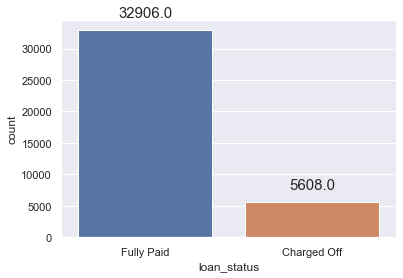

In [26]:
## Dropping loan_status==current rows

# lending_df.loc[:, 'loan_status'] = lending_df['loan_status'].apply(lambda x: 'Fully Paid' if x=='Current' else x)
lending_df = lending_df[~(lending_df['loan_status']=='Current')]

# print(lending_df['loan_status'].value_counts())

## Plotting distribution of loan_status
ax = sns.countplot(x='loan_status', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 10), textcoords = 'offset points', fontsize=15)
    

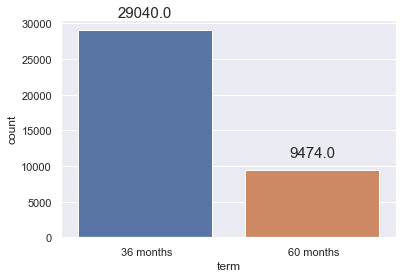

In [27]:
## Listing/Plotting row count for each value in term

# print(lending_df['term'].value_counts())

ax = sns.countplot(x='term', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 10), textcoords = 'offset points', fontsize=15)

In [28]:
## Listing row count for each value in int_rate

lending_df['int_rate'].value_counts()

10.99%    913
11.49%    788
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    342
7.14%     340
6.99%     336
         ... 
15.07%      2
14.70%      2
17.03%      2
14.25%      2
15.38%      2
14.62%      2
14.88%      2
17.90%      2
15.01%      2
15.83%      2
21.82%      2
16.71%      1
17.34%      1
16.01%      1
16.15%      1
22.94%      1
20.52%      1
14.67%      1
16.20%      1
17.44%      1
18.36%      1
24.40%      1
10.64%      1
22.64%      1
16.33%      1
18.72%      1
17.46%      1
17.54%      1
21.48%      1
16.96%      1
Name: int_rate, Length: 370, dtype: int64

In [29]:
## Converting categorical variable int_rate to float datatype by removing %

lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x: float(x.rstrip('%')))
lending_df['int_rate'].value_counts()

10.99    913
11.49    788
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    342
7.14     340
6.99     336
        ... 
21.82      2
17.15      2
14.62      2
14.70      2
14.25      2
17.90      2
17.03      2
20.20      2
15.07      2
15.01      2
14.07      2
16.15      1
10.64      1
22.94      1
14.67      1
18.36      1
17.44      1
16.96      1
17.54      1
16.33      1
24.40      1
16.01      1
17.46      1
16.71      1
21.48      1
17.34      1
16.20      1
20.52      1
18.72      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

count    38514.000000
mean        11.927022
std          3.690123
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64


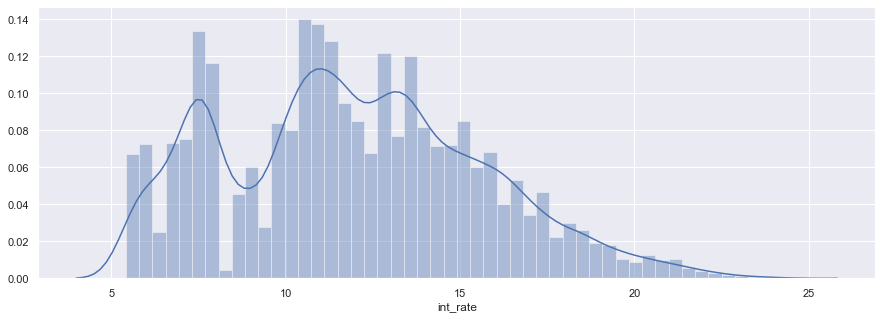

In [30]:
## ## Plotting distribution of int_rate

print(lending_df['int_rate'].describe())

plt.figure(figsize=(15, 5))
sns.distplot(lending_df['int_rate'])

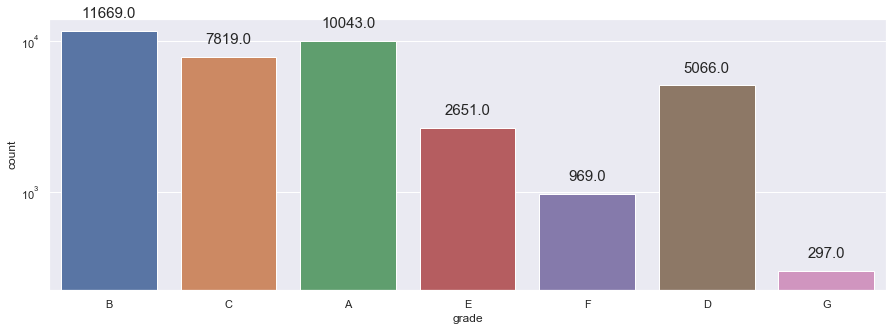

In [31]:
## Listing/Plotting row count for each value in grade

# print(lending_df['grade'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
ax = sns.countplot(x='grade', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 10), textcoords = 'offset points', fontsize=15)

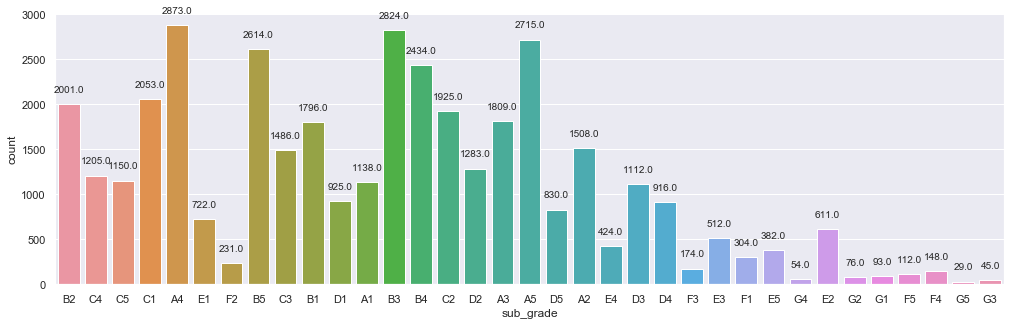

In [32]:
## Listing/Plotting row count for each value in sub-grade
# print(lending_df['sub_grade'].value_counts())

plt.figure(figsize=(17, 5))
ax = sns.countplot(x='sub_grade', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 10), textcoords = 'offset points', fontsize=10)

## Dropping sub-grade since it contains redundant information from grade
lending_df = lending_df.drop(['sub_grade'], axis=1)

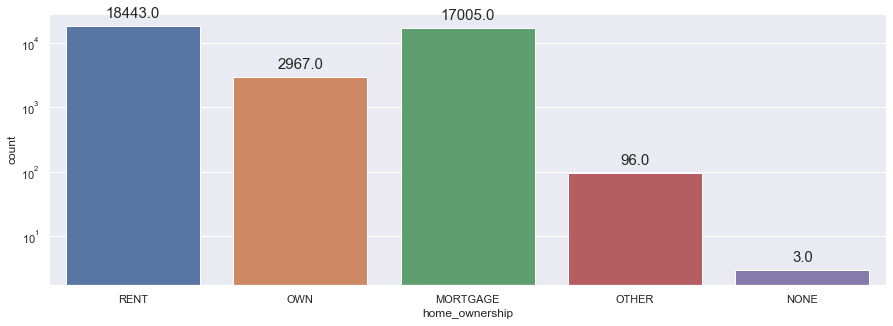

In [33]:
## Listing/Plotting row count for each value in home_ownership

# print(lending_df['home_ownership'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
ax = sns.countplot(x='home_ownership', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

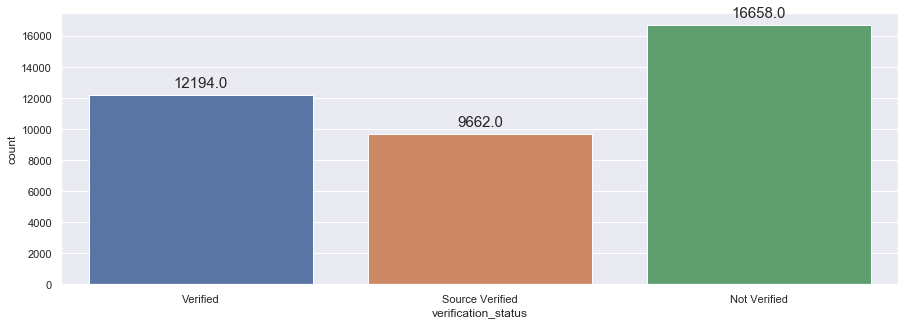

In [34]:
## Listing/Plotting row count for each value in verification_status

# print(lending_df['verification_status'].value_counts())

plt.figure(figsize=(15, 5))
ax = sns.countplot(x='verification_status', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

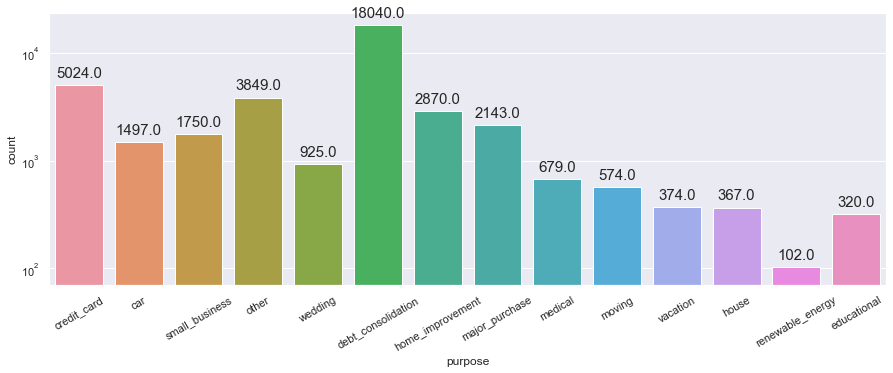

In [35]:
## Listing/Plotting row count for each value in purpose

# print(lending_df['purpose'].value_counts())

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
plt.yscale('log')
ax = sns.countplot(x='purpose', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [36]:
## Listing row count for each value in title
print(lending_df['title'].value_counts())

## Dropping title as it contains redundant information which is already present in purpose
lending_df = lending_df.drop(['title'], axis=1)

Debt Consolidation                          2088
Debt Consolidation Loan                     1619
Personal Loan                                641
Consolidation                                490
debt consolidation                           478
Credit Card Consolidation                    348
Home Improvement                             345
Debt consolidation                           322
Small Business Loan                          305
Personal                                     301
Credit Card Loan                             301
Consolidation Loan                           248
Home Improvement Loan                        230
personal loan                                226
personal                                     208
Loan                                         206
Wedding Loan                                 201
Car Loan                                     193
consolidation                                193
Other Loan                                   180
Credit Card Payoff  

In [37]:
## Listing row count for each value in addr_state

lending_df['addr_state'].value_counts()

CA    6939
NY    3696
FL    2778
TX    2654
NJ    1785
IL    1477
PA    1464
VA    1368
GA    1359
MA    1296
OH    1173
MD    1021
AZ     845
WA     817
CO     765
NC     749
CT     726
MI     704
MO     668
MN     602
NV     478
SC     459
WI     439
AL     434
OR     434
LA     427
KY     311
OK     286
KS     254
UT     252
AR     234
DC     209
RI     194
NM     183
WV     172
NH     166
HI     165
DE     112
MT      83
WY      80
AK      78
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [38]:
## Listing row count for each value in zip_code
print(lending_df['zip_code'].value_counts())

## Dropping the columns as it contains redundant information which is present in addr_state and also last 2 digits are xx
lending_df = lending_df.drop(['zip_code'], axis=1)

100xx    583
945xx    531
112xx    502
606xx    493
070xx    454
900xx    444
021xx    383
300xx    383
926xx    365
750xx    356
941xx    353
921xx    341
917xx    340
331xx    337
770xx    315
117xx    293
113xx    274
852xx    266
913xx    265
330xx    249
891xx    241
080xx    235
925xx    232
902xx    229
334xx    228
201xx    223
920xx    221
951xx    219
980xx    217
303xx    217
        ... 
375xx      1
465xx      1
384xx      1
469xx      1
252xx      1
007xx      1
575xx      1
169xx      1
044xx      1
522xx      1
383xx      1
595xx      1
965xx      1
734xx      1
831xx      1
248xx      1
162xx      1
096xx      1
388xx      1
669xx      1
884xx      1
463xx      1
408xx      1
753xx      1
681xx      1
378xx      1
414xx      1
834xx      1
736xx      1
523xx      1
Name: zip_code, Length: 822, dtype: int64


In [39]:
## Listing row count for each value in earliest_cr_line

lending_df['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    340
Dec-98    340
Dec-97    317
Nov-99    314
Nov-00    312
Sep-00    299
Oct-98    294
Nov-97    293
Dec-95    287
Dec-99    284
Dec-00    277
Jan-00    276
Jul-00    264
Sep-01    264
Nov-96    263
Aug-00    262
Oct-01    261
Dec-96    259
Oct-02    258
Sep-99    255
Aug-98    250
May-00    249
Apr-00    245
Aug-99    242
Oct-97    242
Jan-99    239
Oct-03    239
Sep-98    237
         ... 
Mar-68      1
Nov-08      1
Aug-67      1
Jun-66      1
Nov-62      1
Oct-74      1
Oct-69      1
Sep-56      1
Jun-72      1
Nov-68      1
Jun-59      1
Jan-46      1
May-65      1
Dec-63      1
Apr-66      1
Oct-08      1
Nov-61      1
May-67      1
Nov-54      1
Nov-65      1
Sep-65      1
Oct-54      1
Jun-68      1
Mar-63      1
Dec-65      1
Dec-50      1
Dec-66      1
Sep-63      1
Feb-67      1
Dec-61      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [40]:
## Listing row count for each value in last_credit_pull_d

lending_df['last_credit_pull_d'].value_counts()

May-16    9322
Apr-16    2392
Mar-16    1120
Feb-13     842
Feb-16     733
Jan-16     655
Dec-15     645
Mar-13     576
Mar-14     563
Dec-14     562
Jul-14     552
Sep-14     546
Jul-15     533
Feb-14     530
Oct-14     529
Nov-15     529
Aug-14     522
Jan-14     515
Sep-15     512
Oct-15     502
Nov-14     497
Apr-14     494
Nov-13     473
May-14     472
Jun-14     464
May-13     448
Jan-15     436
Apr-13     425
May-15     422
Aug-15     422
          ... 
Jan-13      34
Oct-09      33
Nov-09      28
Jan-10      27
Aug-09      19
Feb-09      16
Aug-07      15
Apr-09      15
Jan-09      14
Jun-09      13
Jul-09      13
Jun-07      12
Mar-09      10
May-09      10
Sep-09      10
Oct-08       9
Aug-08       9
Sep-08       5
Dec-08       5
Mar-08       4
Jan-08       3
Oct-07       3
Feb-08       3
Dec-07       2
Sep-07       2
Jul-07       1
Jun-08       1
May-07       1
May-08       1
Jul-08       1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [41]:
## Get all the int/float type columns

lending_df.select_dtypes(include=['int64', 'float64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [42]:
## Listing all the metrics related to numeric data

lending_df.select_dtypes(include=['int64', 'float64']).describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,38514.000000,38514.000000,38514.000000,38514.000000,3.851400e+04,38514.000000,38514.000000,38514.000000,38514.000000,38514.000000,38514.000000,38514.000000,38514.000000,38514.000000
mean,11056.089993,11.927022,322.712307,4.811419,6.881140e+04,13.277489,0.146648,0.871605,9.281560,0.055460,13308.277639,48.704458,22.068027,0.042738
std,7348.505656,3.690123,208.663047,3.599087,6.422355e+04,6.671005,0.492082,1.071728,4.399838,0.237891,15870.425577,28.362658,11.422222,0.202909
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5325.000000,8.940000,165.740000,2.000000,4.000000e+04,8.140000,0.000000,0.000000,6.000000,0.000000,3667.000000,25.200000,13.000000,0.000000
50%,9612.500000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8779.000000,49.100000,20.000000,0.000000
75%,15000.000000,14.350000,426.100000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16932.500000,72.300000,29.000000,0.000000
max,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


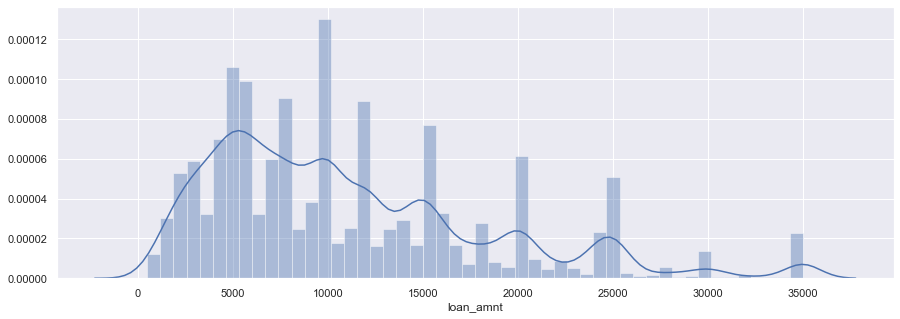

In [43]:
## Plotting distribution of loan_amt

plt.figure(figsize=(15, 5))
sns.distplot(lending_df['loan_amnt'])

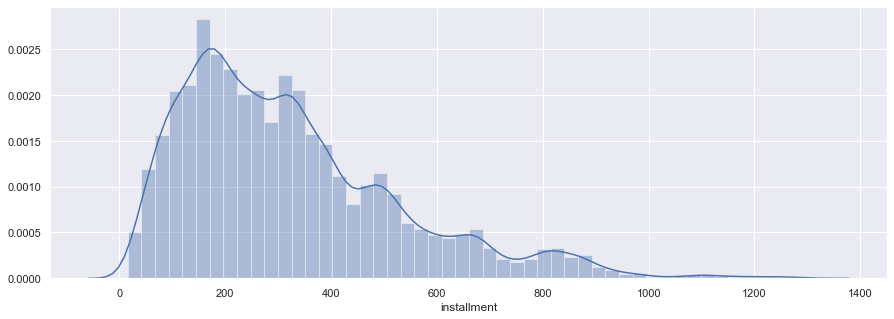

In [44]:
## Plotting distribution of installment

plt.figure(figsize=(15, 5))
sns.distplot(lending_df['installment'])

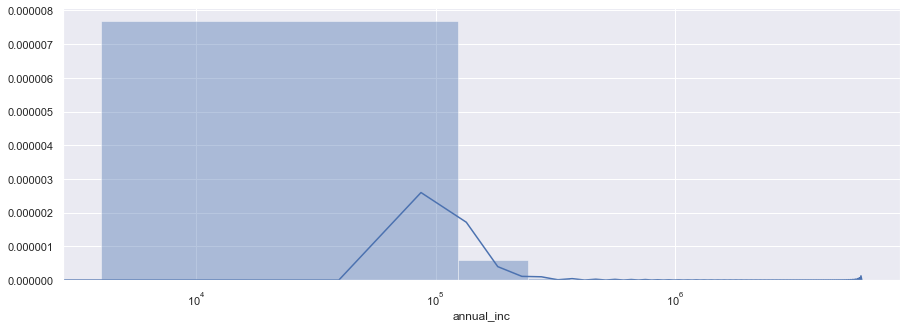

In [45]:
## Plotting distribution of annual_inc in log scale

fig, ax =  plt.subplots(figsize=(15, 5))
ax.set_xscale('log')
sns.distplot(lending_df['annual_inc'], ax=ax)

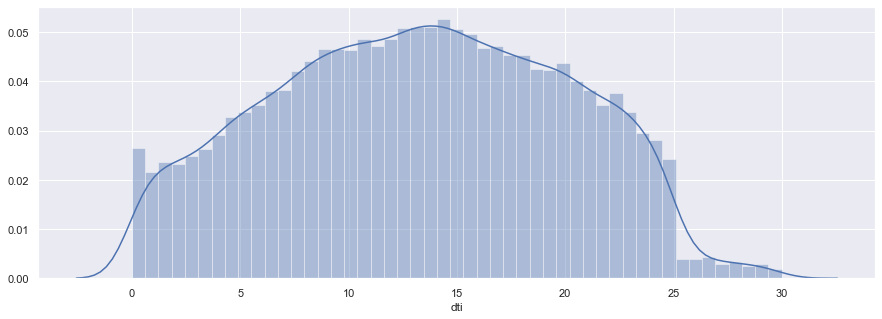

In [46]:
## Plotting distribution of dti

plt.figure(figsize=(15, 5))
sns.distplot(lending_df['dti'])

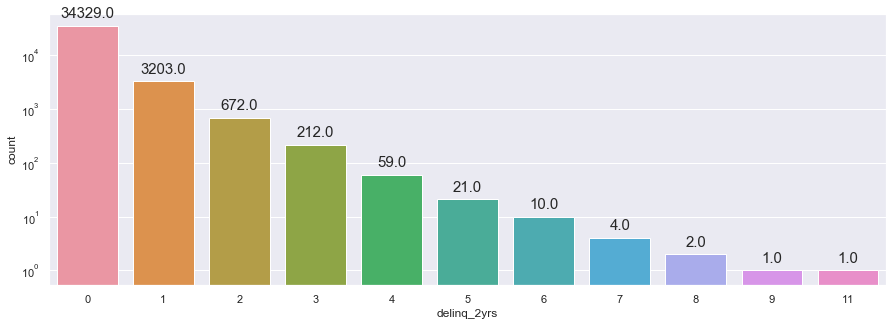

In [47]:
## Plotting countplot of delinq_2yrs

# print(lending_df['delinq_2yrs'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
# sns.distplot(lending_df['delinq_2yrs'])
ax = sns.countplot(x='delinq_2yrs', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

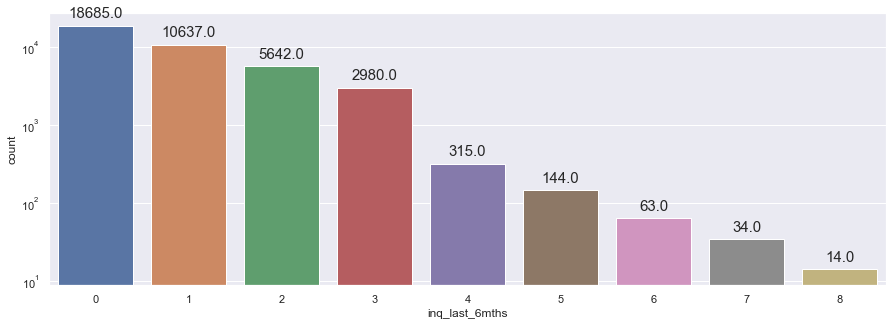

In [48]:
## Plotting countplot of inq_last_6mths

# print(lending_df['inq_last_6mths'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
# sns.distplot(lending_df['inq_last_6mths'])
ax = sns.countplot(x='inq_last_6mths', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

7     3906
6     3842
8     3809
9     3603
5     3108
10    3096
11    2664
4     2294
12    2197
13    1853
3     1457
14    1427
15    1145
16     906
17     716
2      580
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64


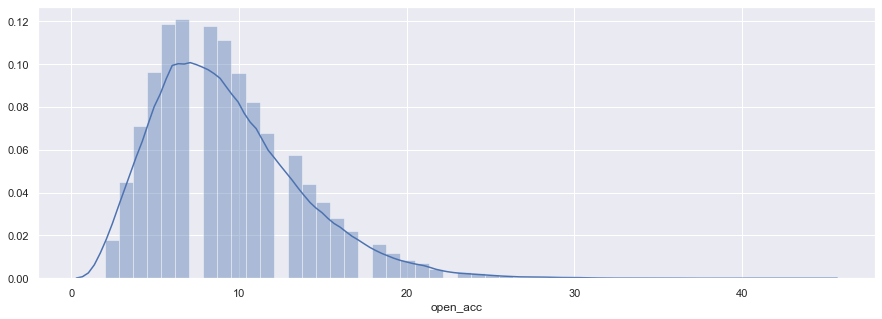

In [49]:
## Plotting distribution of open_acc

print(lending_df['open_acc'].value_counts())
plt.figure(figsize=(15, 5))
sns.distplot(lending_df['open_acc'])

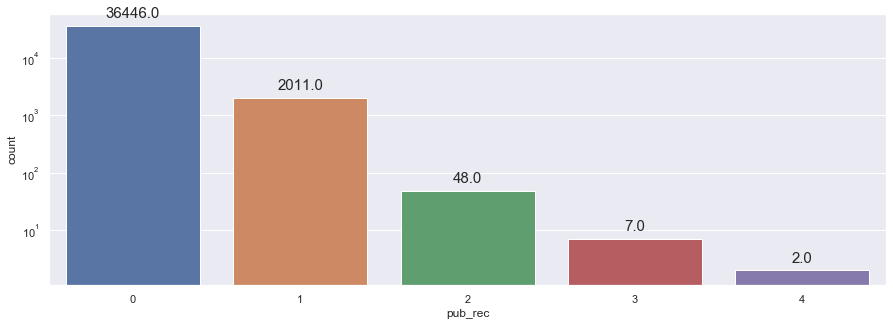

In [50]:
## Plotting countplot of pub_rec

# print(lending_df['pub_rec'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
# sns.distplot(lending_df['pub_rec'])
ax = sns.countplot(x='pub_rec', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

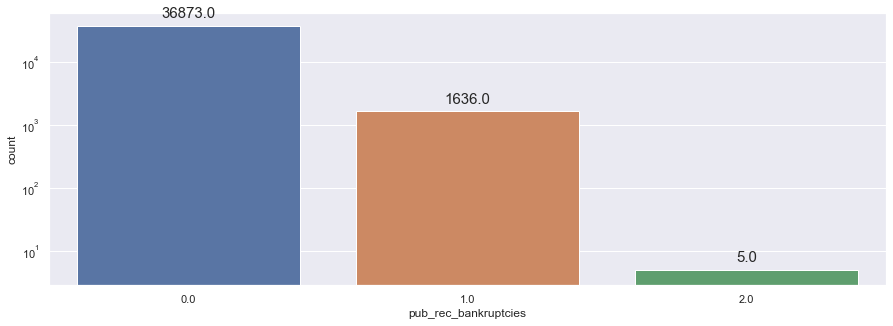

In [51]:
## Plotting countplot of pub_rec_bankruptcies

# print(lending_df['pub_rec_bankruptcies'].value_counts())

plt.figure(figsize=(15, 5))
plt.yscale('log')
# sns.distplot(lending_df['pub_rec_bankruptcies'])
ax = sns.countplot(x='pub_rec_bankruptcies', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [52]:
## Correlation between pub_rec and pub_rec_bankruptcies

lending_df[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.841682
pub_rec_bankruptcies,0.841682,1.000000


In [53]:
## Dropping pub_rec_bankruptcies as it is highly correlated with pub_rec

lending_df = lending_df.drop(['pub_rec_bankruptcies'], axis=1)

0         923
298        14
255        14
1          12
682        11
6           9
52          9
865         9
1763        9
346         9
39          9
2639        8
3808        8
5626        8
554         8
2725        8
5272        8
66          8
13368       8
5           8
3667        8
10          8
798         8
306         8
9           8
3612        8
1159        8
1815        8
400         8
1284        8
         ... 
2008        1
8649        1
10696       1
71642       1
100796      1
33309       1
27168       1
25121       1
24467       1
10856       1
25185       1
37471       1
35420       1
6734        1
16255       1
18320       1
22418       1
10824       1
26516       1
29219       1
28565       1
6042        1
557         1
10140       1
12843       1
14238       1
11788       1
21031       1
16933       1
21152       1
Name: revol_bal, Length: 21273, dtype: int64


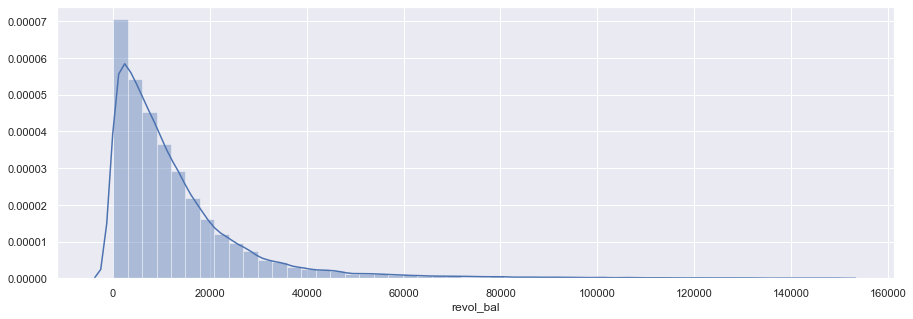

In [54]:
## Plotting distribution of revol_bal

print(lending_df['revol_bal'].value_counts())
plt.figure(figsize=(15, 5))
sns.distplot(lending_df['revol_bal'])

0.00     954
63.00     62
0.20      62
31.20     57
40.70     57
66.70     56
61.00     56
70.40     56
66.60     55
0.10      55
46.40     55
57.40     55
37.60     55
75.50     54
64.60     54
64.80     54
32.00     54
46.60     54
48.90     53
34.40     53
35.30     53
25.50     53
68.70     53
65.90     53
70.80     53
49.80     53
48.00     52
45.60     52
33.70     52
51.10     52
        ... 
3.18       1
33.26      1
7.43       1
0.04       1
37.63      1
58.77      1
81.31      1
54.22      1
0.16       1
8.01       1
37.73      1
69.98      1
36.88      1
6.75       1
29.53      1
11.63      1
4.85       1
8.46       1
21.92      1
34.89      1
33.29      1
70.26      1
0.01       1
0.46       1
58.19      1
26.33      1
0.03       1
11.62      1
24.63      1
27.81      1
Name: revol_util, Length: 1088, dtype: int64


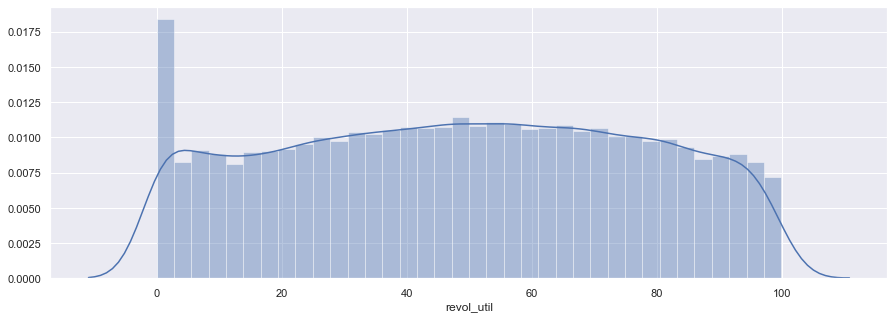

In [55]:
## Plotting distribution of revol_util

print(lending_df['revol_util'].value_counts())
plt.figure(figsize=(15, 5))
sns.distplot(lending_df['revol_util'])

16    1423
15    1417
17    1411
14    1400
20    1390
18    1378
13    1366
21    1356
19    1303
12    1289
22    1254
11    1236
24    1221
23    1210
10    1168
25    1113
9     1051
27    1048
26    1026
8      986
28     944
29     894
30     846
7      810
31     766
32     760
6      670
33     624
34     612
35     560
      ... 
54      64
55      54
56      48
57      42
61      41
59      39
62      37
58      33
60      27
64       5
66       4
67       4
2        4
65       3
79       2
75       2
76       2
81       1
80       1
74       1
87       1
68       1
78       1
69       1
77       1
70       1
71       1
72       1
90       1
73       1
Name: total_acc, Length: 82, dtype: int64


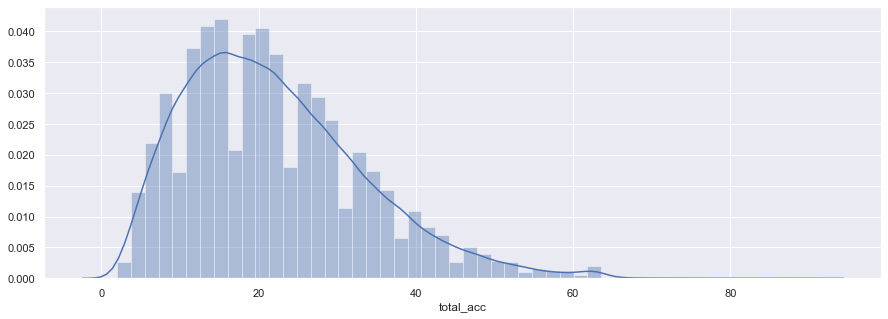

In [56]:
## Plotting distribution of total_acc

print(lending_df['total_acc'].value_counts())
plt.figure(figsize=(15, 5))
sns.distplot(lending_df['total_acc'])

In [57]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38514 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt              38514 non-null int64
term                   38514 non-null object
int_rate               38514 non-null float64
installment            38514 non-null float64
grade                  38514 non-null object
emp_length             38514 non-null int64
home_ownership         38514 non-null object
annual_inc             38514 non-null float64
verification_status    38514 non-null object
loan_status            38514 non-null object
purpose                38514 non-null object
addr_state             38514 non-null object
dti                    38514 non-null float64
delinq_2yrs            38514 non-null int64
earliest_cr_line       38514 non-null object
inq_last_6mths         38514 non-null int64
open_acc               38514 non-null int64
pub_rec                38514 non-null int64
revol_bal              38514 non-null int64
revol_util             38514 non-null f

## Segmented Univariate Analysis

In [58]:
## Get all the object(categorical) type columns

lending_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38514 entries, 0 to 39716
Data columns (total 9 columns):
term                   38514 non-null object
grade                  38514 non-null object
home_ownership         38514 non-null object
verification_status    38514 non-null object
loan_status            38514 non-null object
purpose                38514 non-null object
addr_state             38514 non-null object
earliest_cr_line       38514 non-null object
last_credit_pull_d     38514 non-null object
dtypes: object(9)
memory usage: 4.2+ MB


In [59]:
## Groupby term and loan_status columns to get count for all the possible combinatios of term and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_term = lending_df.groupby(['term', 'loan_status']).apply(aggregator).reset_index()

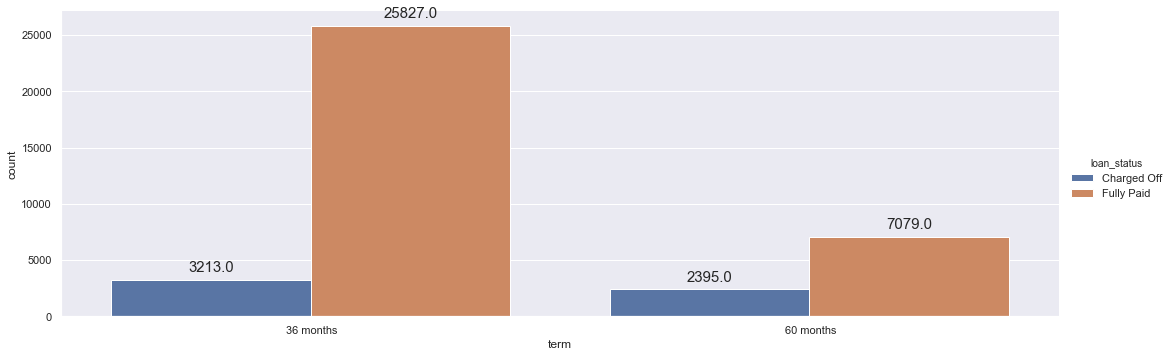

In [60]:
## Plotting categorical plot 

g = sns.catplot(x='term', y='count', hue='loan_status', data=lending_df_term, height=5, aspect=3, kind='bar')

for ax in g.axes.ravel():
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [61]:
## removing months from the term values and then converting categorical data to one-hot encoding form
lending_df['term'] = lending_df['term'].apply(lambda x: x.split()[0])

lending_df_term = pd.get_dummies(lending_df['term'], prefix='term')
lending_df = lending_df.drop(['term'], axis=1)
lending_df = pd.concat([lending_df, lending_df_term], axis=1)

del lending_df_term
lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,term_36,term_60
0,5000,10.65,162.87,B,10,RENT,24000.0,Verified,Fully Paid,credit_card,...,Jan-85,1,3,0,13648,83.7,9,May-16,1,0
1,2500,15.27,59.83,C,0,RENT,30000.0,Source Verified,Charged Off,car,...,Apr-99,5,3,0,1687,9.4,4,Sep-13,0,1
2,2400,15.96,84.33,C,10,RENT,12252.0,Not Verified,Fully Paid,small_business,...,Nov-01,2,2,0,2956,98.5,10,May-16,1,0
3,10000,13.49,339.31,C,10,RENT,49200.0,Source Verified,Fully Paid,other,...,Feb-96,1,10,0,5598,21.0,37,Apr-16,1,0
5,5000,7.90,156.46,A,3,RENT,36000.0,Source Verified,Fully Paid,wedding,...,Nov-04,3,9,0,7963,28.3,12,Jan-16,1,0


In [62]:
## Groupby grade and loan_status columns to get count for all the possible combinatios of grade and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_grade = lending_df.groupby(['grade', 'loan_status']).apply(aggregator).reset_index()

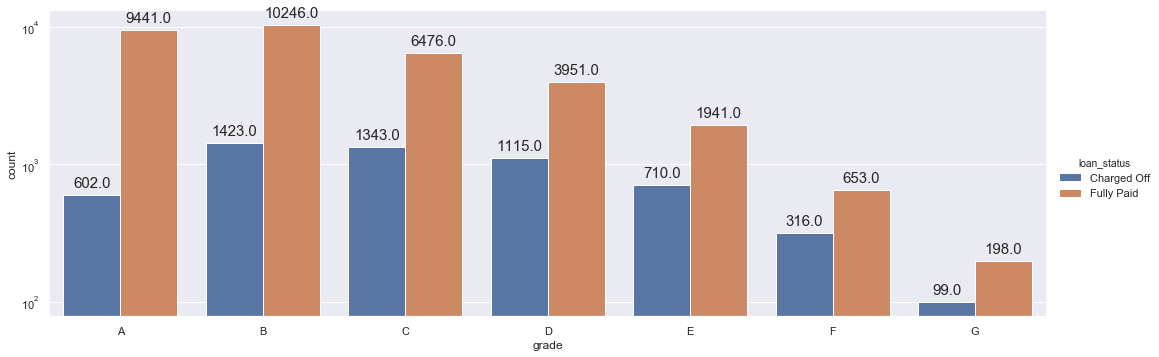

In [63]:
## Plotting categorical plot 

g = sns.catplot(x='grade', y='count', hue='loan_status', data=lending_df_grade, height=5, aspect=3, kind='bar')
g.set(yscale='log')

for ax in g.axes.ravel():
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [64]:
## converting categorical variable grade to one-hot encoding form

lending_df_grade = pd.get_dummies(lending_df['grade'], prefix='grade')
# lending_df = lending_df.drop(['grade'], axis=1)
lending_df = pd.concat([lending_df, lending_df_grade], axis=1)

lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,last_credit_pull_d,term_36,term_60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000,10.65,162.87,B,10,RENT,24000.0,Verified,Fully Paid,credit_card,...,May-16,1,0,0,1,0,0,0,0,0
1,2500,15.27,59.83,C,0,RENT,30000.0,Source Verified,Charged Off,car,...,Sep-13,0,1,0,0,1,0,0,0,0
2,2400,15.96,84.33,C,10,RENT,12252.0,Not Verified,Fully Paid,small_business,...,May-16,1,0,0,0,1,0,0,0,0
3,10000,13.49,339.31,C,10,RENT,49200.0,Source Verified,Fully Paid,other,...,Apr-16,1,0,0,0,1,0,0,0,0
5,5000,7.90,156.46,A,3,RENT,36000.0,Source Verified,Fully Paid,wedding,...,Jan-16,1,0,1,0,0,0,0,0,0


In [65]:
## Groupby home_ownership and loan_status columns to get count for all the possible combinatios of home_ownership and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_home_ownership = lending_df.groupby(['home_ownership', 'loan_status']).apply(aggregator).reset_index()

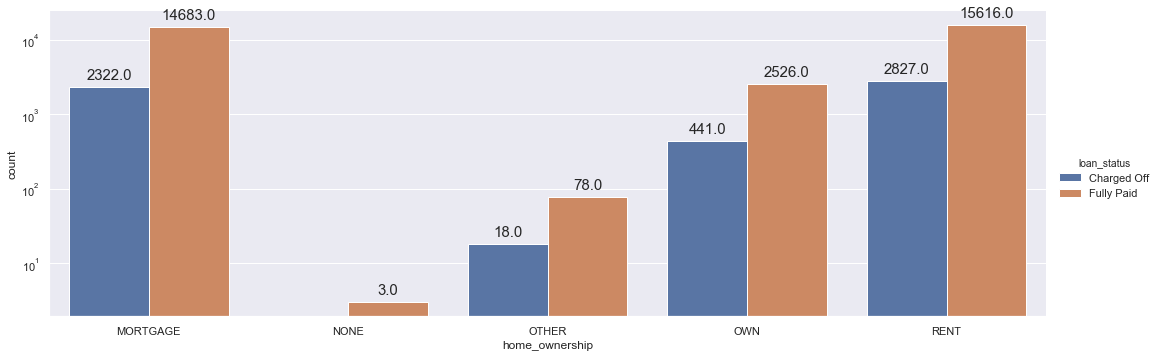

In [66]:
## Plotting categorical plot 

g = sns.catplot(x='home_ownership', y='count', hue='loan_status', data=lending_df_home_ownership, height=5, aspect=3, kind='bar')
g.set(yscale='log')

for ax in g.axes.ravel():
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [67]:
## converting categorical variable home_ownership to one-hot encoding form

lending_df_home_ownership = pd.get_dummies(lending_df['home_ownership'], prefix='home_ownership')
lending_df = lending_df.drop(['home_ownership'], axis=1)
lending_df = pd.concat([lending_df, lending_df_home_ownership], axis=1)

lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,purpose,addr_state,...,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,10.65,162.87,B,10,24000.0,Verified,Fully Paid,credit_card,AZ,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,59.83,C,0,30000.0,Source Verified,Charged Off,car,GA,...,1,0,0,0,0,0,0,0,0,1
2,2400,15.96,84.33,C,10,12252.0,Not Verified,Fully Paid,small_business,IL,...,1,0,0,0,0,0,0,0,0,1
3,10000,13.49,339.31,C,10,49200.0,Source Verified,Fully Paid,other,CA,...,1,0,0,0,0,0,0,0,0,1
5,5000,7.90,156.46,A,3,36000.0,Source Verified,Fully Paid,wedding,AZ,...,0,0,0,0,0,0,0,0,0,1


In [68]:
## Groupby verification_status and loan_status columns to get count for all the possible combinatios of verification_status and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_verification_status = lending_df.groupby(['verification_status', 'loan_status']).apply(aggregator).reset_index()

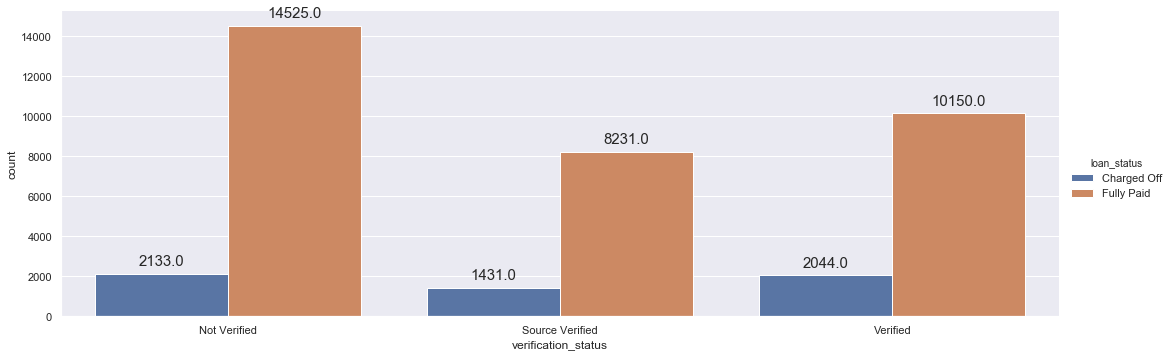

In [69]:
## Plotting categorical plot 

g = sns.catplot(x='verification_status', y='count', hue='loan_status', data=lending_df_verification_status, height=5, aspect=3, kind='bar')

for ax in g.axes.ravel():
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [70]:
## converting categorical variable verification_status to one-hot encoding form

lending_df_verification_status = pd.get_dummies(lending_df['verification_status'], prefix='verification_status')
lending_df = lending_df.drop(['verification_status'], axis=1)
lending_df = pd.concat([lending_df, lending_df_verification_status], axis=1)

lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,addr_state,dti,...,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000,10.65,162.87,B,10,24000.0,Fully Paid,credit_card,AZ,27.65,...,0,0,0,0,0,0,1,0,0,1
1,2500,15.27,59.83,C,0,30000.0,Charged Off,car,GA,1.00,...,0,0,0,0,0,0,1,0,1,0
2,2400,15.96,84.33,C,10,12252.0,Fully Paid,small_business,IL,8.72,...,0,0,0,0,0,0,1,1,0,0
3,10000,13.49,339.31,C,10,49200.0,Fully Paid,other,CA,20.00,...,0,0,0,0,0,0,1,0,1,0
5,5000,7.90,156.46,A,3,36000.0,Fully Paid,wedding,AZ,11.20,...,0,0,0,0,0,0,1,0,1,0


In [71]:
## Groupby purpose and loan_status columns to get count for all the possible combinatios of purpose and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_purpose = lending_df.groupby(['purpose', 'loan_status']).apply(aggregator).reset_index()

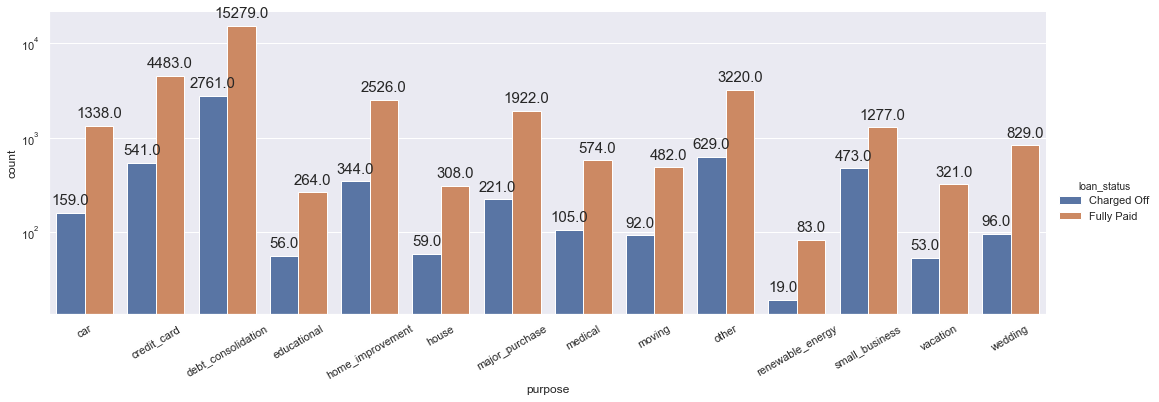

In [72]:
## Plotting categorical plot 

g = sns.catplot(x='purpose', y='count', hue='loan_status', data=lending_df_purpose, height=5, aspect=3, kind='bar')
g.set(yscale='log')
g.set_xticklabels(rotation=30)

for ax in g.axes.ravel():
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

In [73]:
## converting categorical variable purpose to one-hot encoding form

lending_df_purpose = pd.get_dummies(lending_df['purpose'], prefix='purpose')
# lending_df = lending_df.drop(['purpose'], axis=1)
lending_df = pd.concat([lending_df, lending_df_purpose], axis=1)

lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,addr_state,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,10.65,162.87,B,10,24000.0,Fully Paid,credit_card,AZ,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500,15.27,59.83,C,0,30000.0,Charged Off,car,GA,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,15.96,84.33,C,10,12252.0,Fully Paid,small_business,IL,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000,13.49,339.31,C,10,49200.0,Fully Paid,other,CA,20.00,...,0,0,0,0,0,1,0,0,0,0
5,5000,7.90,156.46,A,3,36000.0,Fully Paid,wedding,AZ,11.20,...,0,0,0,0,0,0,0,0,0,1


In [74]:
## Groupby addr_state and loan_status columns to get count for all the possible combinatios of addr_state and loan_status

def aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_addr_state = lending_df.groupby(['addr_state', 'loan_status']).apply(aggregator).reset_index()

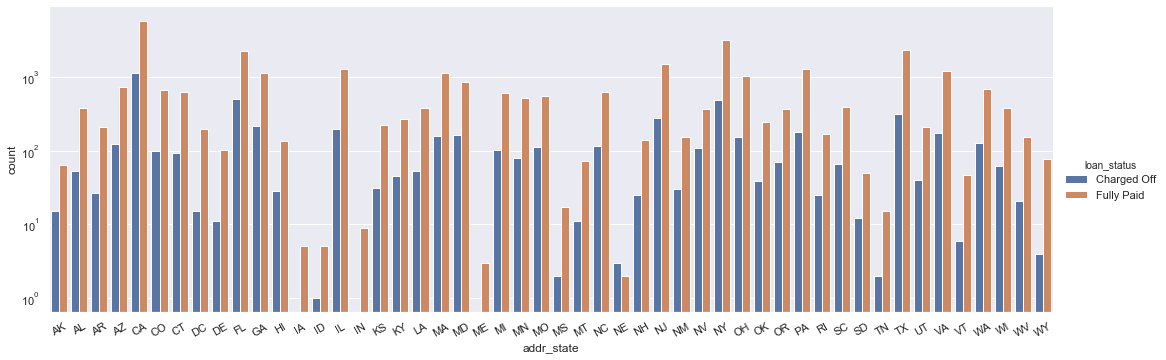

In [75]:
## Plotting categorical plot 

g = sns.catplot(x='addr_state', y='count', hue='loan_status', data=lending_df_addr_state, height=5, aspect=3, kind='bar')
g.set(yscale='log')
g.set_xticklabels(rotation=30)

## Too many values in addr_state to convert it to one-hot encoding form

In [76]:
## Converting last_credit_pull_d from object datatype to datetime datatype and extract date

lending_df['last_credit_pull_d'] = pd.to_datetime(lending_df['last_credit_pull_d'], format='%b-%y')
lending_df['last_credit_pull_d_year'] = lending_df['last_credit_pull_d'].dt.year

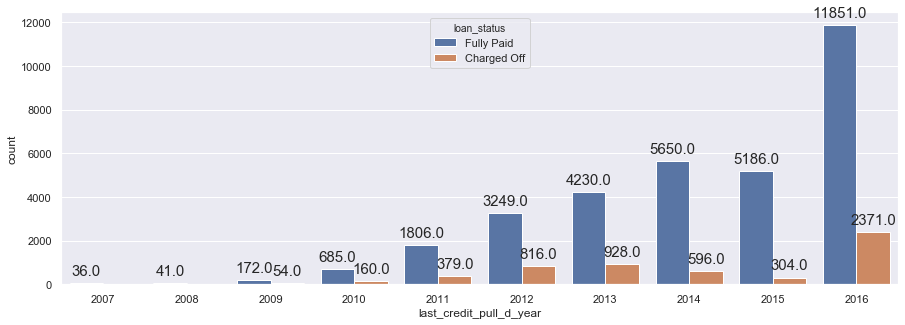

In [77]:
## Plotting time-series data using last_credit_pull_d as time and box plot distribution of loan_status for each date

## Converting loan_status data such that 1 indicates Defaulters 
# lending_df_lcpd = lending_df.copy()
# lending_df_lcpd['loan_status'] = lending_df_lcpd['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

# g = sns.catplot(x='last_credit_pull_d', y='loan_status', data=lending_df_lcpd.sort_values(['last_credit_pull_d'], ascending=True), height=5, aspect=3, kind='box')
# g.set_xticklabels(rotation=90)

# del lending_df_lcpd
# print(lending_df['last_credit_pull_d_year'].value_counts())
plt.figure(figsize=(15, 5))
# plt.yscale('log')
ax = sns.countplot(x='last_credit_pull_d_year', hue='loan_status', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)
## last_credit_pull_d is a time series data and no way to get correlation with loan_status

In [78]:
lending_df['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    340
Dec-98    340
Dec-97    317
Nov-99    314
Nov-00    312
Sep-00    299
Oct-98    294
Nov-97    293
Dec-95    287
Dec-99    284
Dec-00    277
Jan-00    276
Jul-00    264
Sep-01    264
Nov-96    263
Aug-00    262
Oct-01    261
Dec-96    259
Oct-02    258
Sep-99    255
Aug-98    250
May-00    249
Apr-00    245
Aug-99    242
Oct-97    242
Jan-99    239
Oct-03    239
Sep-98    237
         ... 
Mar-68      1
Nov-08      1
Aug-67      1
Jun-66      1
Nov-62      1
Oct-74      1
Oct-69      1
Sep-56      1
Jun-72      1
Nov-68      1
Jun-59      1
Jan-46      1
May-65      1
Dec-63      1
Apr-66      1
Oct-08      1
Nov-61      1
May-67      1
Nov-54      1
Nov-65      1
Sep-65      1
Oct-54      1
Jun-68      1
Mar-63      1
Dec-65      1
Dec-50      1
Dec-66      1
Sep-63      1
Feb-67      1
Dec-61      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [79]:
## Converting earliest_cr_line from object datatype to datetime datatype and extract date

lending_df['earliest_cr_line'] = pd.to_datetime(lending_df['earliest_cr_line'], format='%b-%y')
lending_df['earliest_cr_line_year'] = lending_df['earliest_cr_line'].dt.year

lending_df['earliest_cr_line_year'] = lending_df['earliest_cr_line_year'].apply(lambda x: x-100 if x>=2046 else x)

2000    3158
1999    2895
1998    2770
2001    2459
1997    2382
1996    2200
1995    2075
1994    1943
2002    1886
2003    1807
2004    1722
1993    1460
2005    1460
2006    1145
1992    1028
1990    1004
1991     945
1989     833
1988     709
2007     695
1987     590
1986     478
1985     439
1984     394
1983     322
1982     215
1981     181
1980     175
1978     161
1979     157
2008     152
1977     112
1976      93
1975      83
1974      62
1973      61
1972      49
1970      47
1971      45
1969      37
1968      19
1967      18
1966      11
1963      10
1965       8
1964       6
1962       5
1961       2
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line_year, dtype: int64


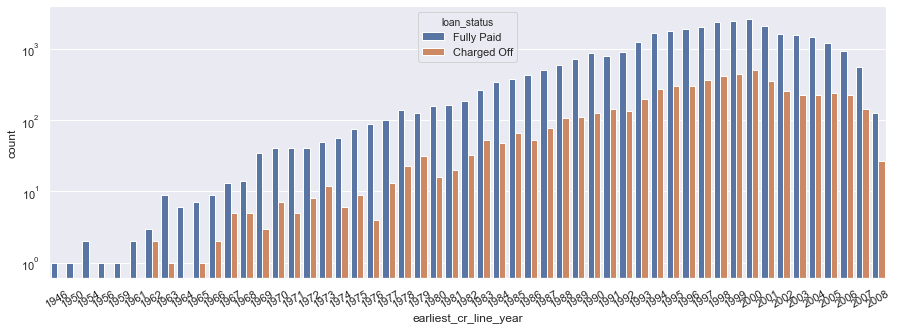

In [80]:
## Plotting time-series data using earliest_cr_line as time and box plot distribution of loan_status for each date

## Converting loan_status data such that 1 indicates Defaulters 
# lending_df_ecl = lending_df.copy()
# lending_df_ecl['loan_status'] = lending_df_ecl['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

# g = sns.catplot(x='earliest_cr_line', y='loan_status', data=lending_df_ecl.sort_values(['earliest_cr_line'], ascending=True), height=5, aspect=3, kind='box')
# g.set_xticklabels(rotation=90)

# del lending_df_ecl

print(lending_df['earliest_cr_line_year'].value_counts())
plt.figure(figsize=(15, 5))
plt.yscale('log')
plt.xticks(rotation=30)
sns.countplot(x='earliest_cr_line_year', hue='loan_status', data=lending_df)

## earliest_cr_line is a time series data and no way to get correlation with loan_status

In [81]:
lending_df.select_dtypes(include=['int64', 'float64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d_year',
       'earliest_cr_line_year'],
      dtype='object')

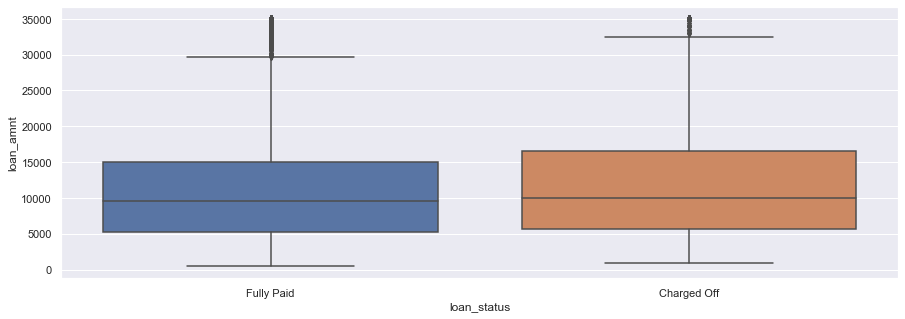

In [82]:
## Plotting loan amount distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='loan_amnt', x='loan_status', data=lending_df)

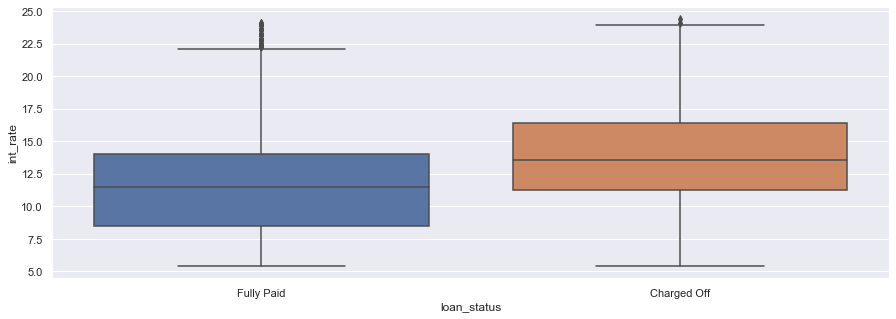

In [83]:
## Plotting int rate distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='int_rate', x='loan_status', data=lending_df)

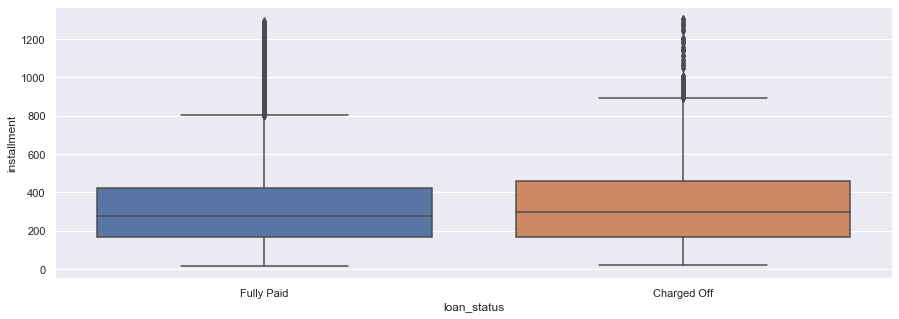

In [84]:
## Plotting installment distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='installment', x='loan_status', data=lending_df)

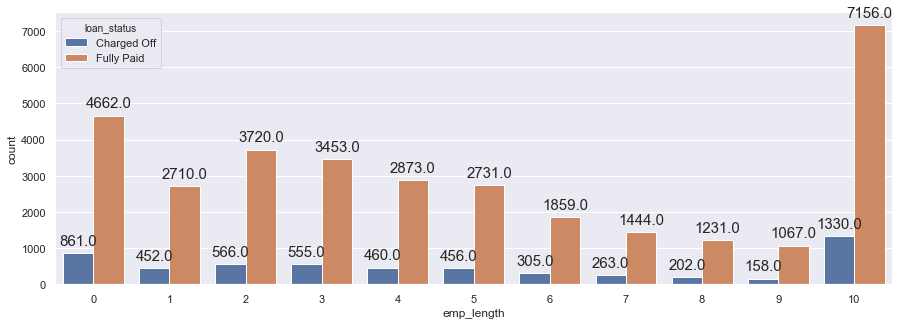

In [85]:
## Plotting emp_length distribution for loan_status fully paid and charged off

def emp_length_aggregator(x):
    data = {
        'count': x['installment'].count()
    }
    return pd.Series(data, index=['count'])

lending_df_emp_length = lending_df.groupby(['emp_length', 'loan_status']).apply(emp_length_aggregator).reset_index()

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='emp_length', y='count', hue='loan_status', data=lending_df_emp_length)

# for ax in g.axes.ravel():
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

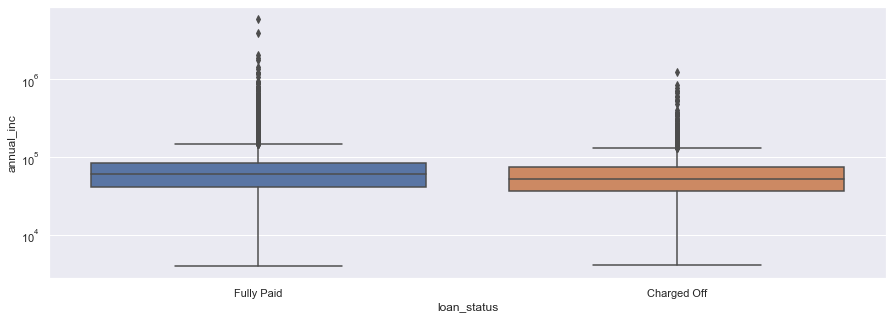

In [86]:
## Plotting  distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
plt.yscale('log')
sns.boxplot(y='annual_inc', x='loan_status', data=lending_df)

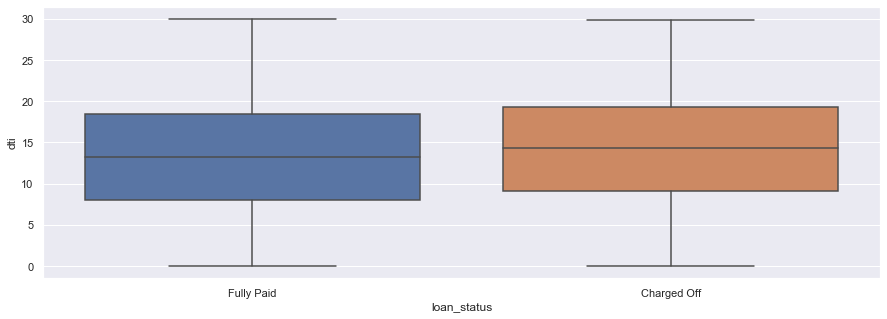

In [87]:
## Plotting dti distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='dti', x='loan_status', data=lending_df)

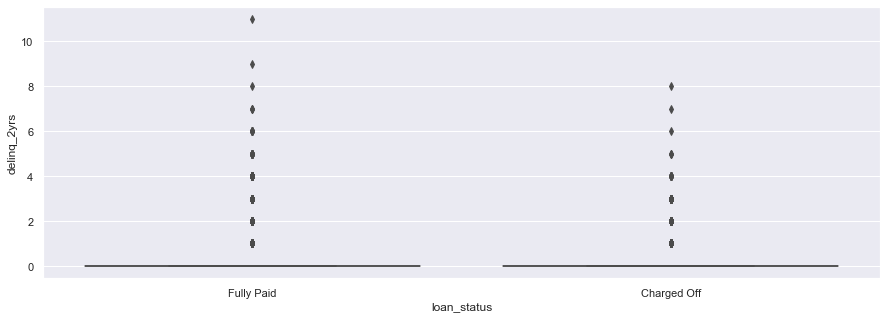

In [88]:
## Plotting delinq_2yrs distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='delinq_2yrs', x='loan_status', data=lending_df)

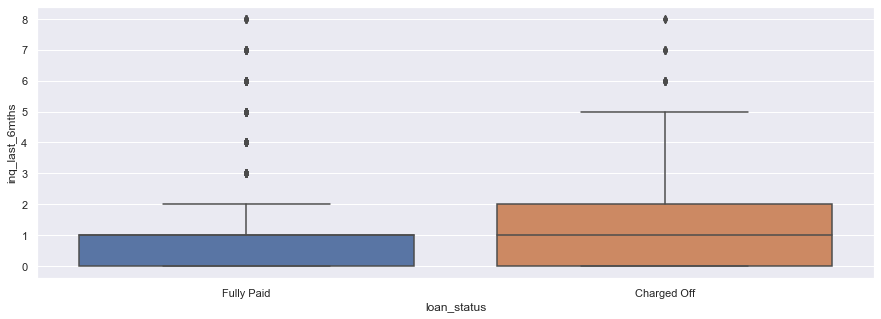

In [89]:
## Plotting inq_last_6mths distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='inq_last_6mths', x='loan_status', data=lending_df)

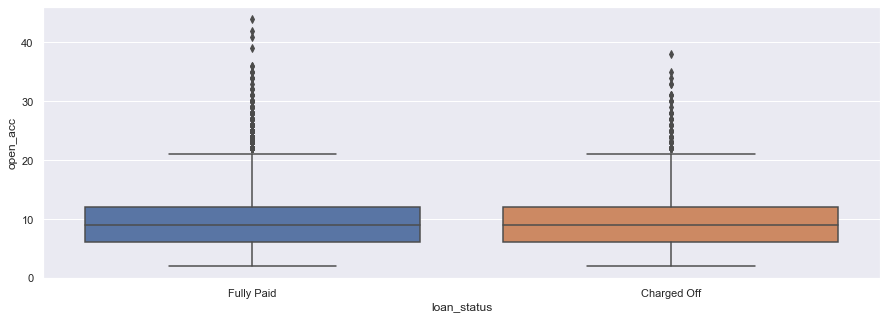

In [90]:
## Plotting open_acc distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='open_acc', x='loan_status', data=lending_df)

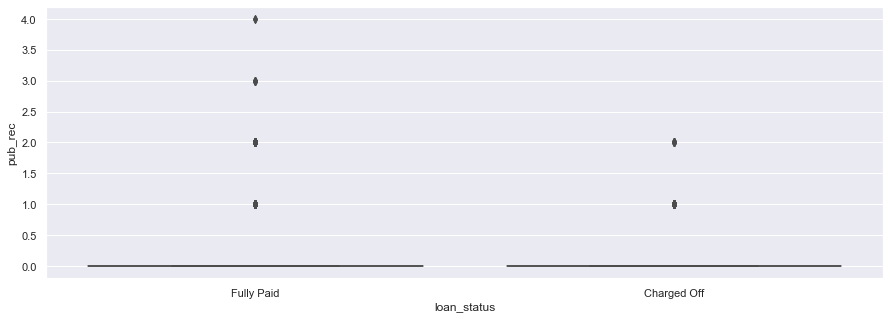

In [91]:
## Plotting pub_rec distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='pub_rec', x='loan_status', data=lending_df)

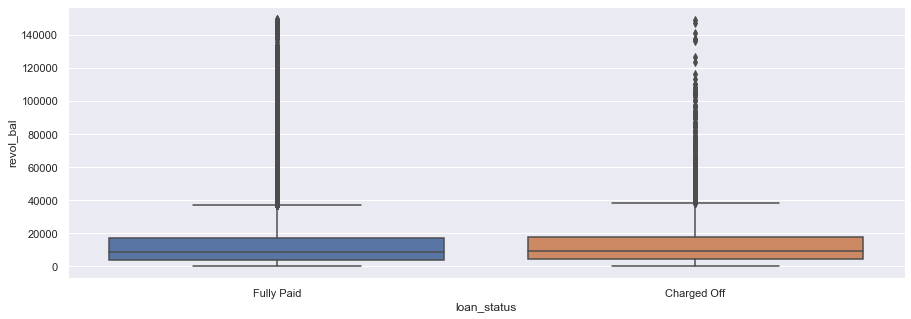

In [92]:
## Plotting revol_bal distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='revol_bal', x='loan_status', data=lending_df)

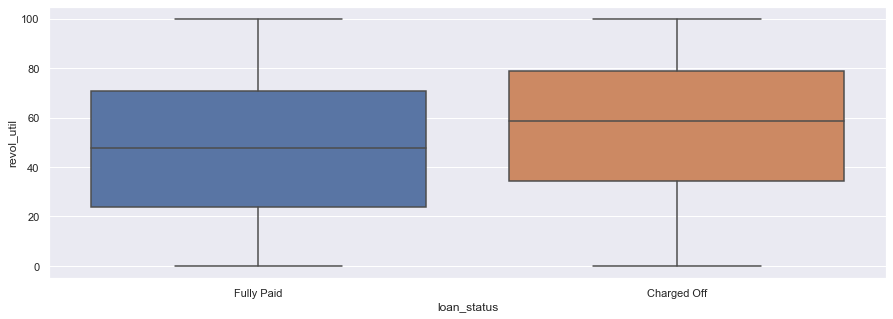

In [93]:
## Plotting revol_util distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='revol_util', x='loan_status', data=lending_df)

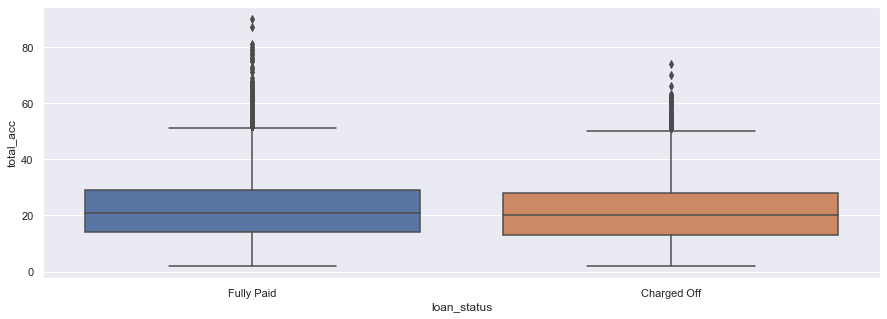

In [94]:
## Plotting total_acc distribution for loan_status fully paid and charged off

plt.figure(figsize=(15, 5))
sns.boxplot(y='total_acc', x='loan_status', data=lending_df)

## Derived Variables

In [95]:
## Add ratio of loan amount/annual income as another column

lending_df.loc[:,'loan_amnt_annual_inc_ratio'] = lending_df['loan_amnt']/lending_df['annual_inc']

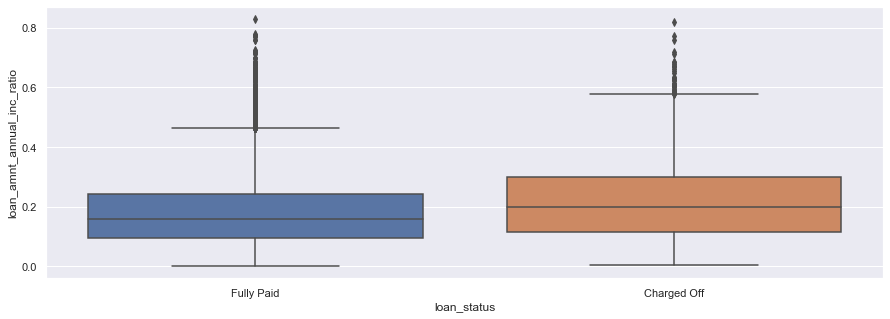

In [96]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='loan_status', y='loan_amnt_annual_inc_ratio', data=lending_df)
# sns.boxplot(x='loan_status_Charged Off', y='loan_amnt_annual_inc_ratio', data=lending_df)

## Bivariate Analysis

In [97]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38514 entries, 0 to 39716
Data columns (total 53 columns):
loan_amnt                              38514 non-null int64
int_rate                               38514 non-null float64
installment                            38514 non-null float64
grade                                  38514 non-null object
emp_length                             38514 non-null int64
annual_inc                             38514 non-null float64
loan_status                            38514 non-null object
purpose                                38514 non-null object
addr_state                             38514 non-null object
dti                                    38514 non-null float64
delinq_2yrs                            38514 non-null int64
earliest_cr_line                       38514 non-null datetime64[ns]
inq_last_6mths                         38514 non-null int64
open_acc                               38514 non-null int64
pub_rec                       

In [98]:
## Converting loan_status to one-hot encoding to get driving factors for 'Charged Off' value

lending_df_loan_status = pd.get_dummies(lending_df['loan_status'], prefix='loan_status')
lending_df = lending_df.drop(['loan_status'], axis=1)
lending_df = pd.concat([lending_df, lending_df_loan_status], axis=1)

lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,purpose,addr_state,dti,delinq_2yrs,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,last_credit_pull_d_year,earliest_cr_line_year,loan_amnt_annual_inc_ratio,loan_status_Charged Off,loan_status_Fully Paid
0,5000,10.65,162.87,B,10,24000.0,credit_card,AZ,27.65,0,...,0,0,0,0,0,2016,1985,0.208333,0,1
1,2500,15.27,59.83,C,0,30000.0,car,GA,1.00,0,...,0,0,0,0,0,2013,1999,0.083333,1,0
2,2400,15.96,84.33,C,10,12252.0,small_business,IL,8.72,0,...,0,0,1,0,0,2016,2001,0.195886,0,1
3,10000,13.49,339.31,C,10,49200.0,other,CA,20.00,0,...,1,0,0,0,0,2016,1996,0.203252,0,1
5,5000,7.90,156.46,A,3,36000.0,wedding,AZ,11.20,0,...,0,0,0,0,1,2016,2004,0.138889,0,1


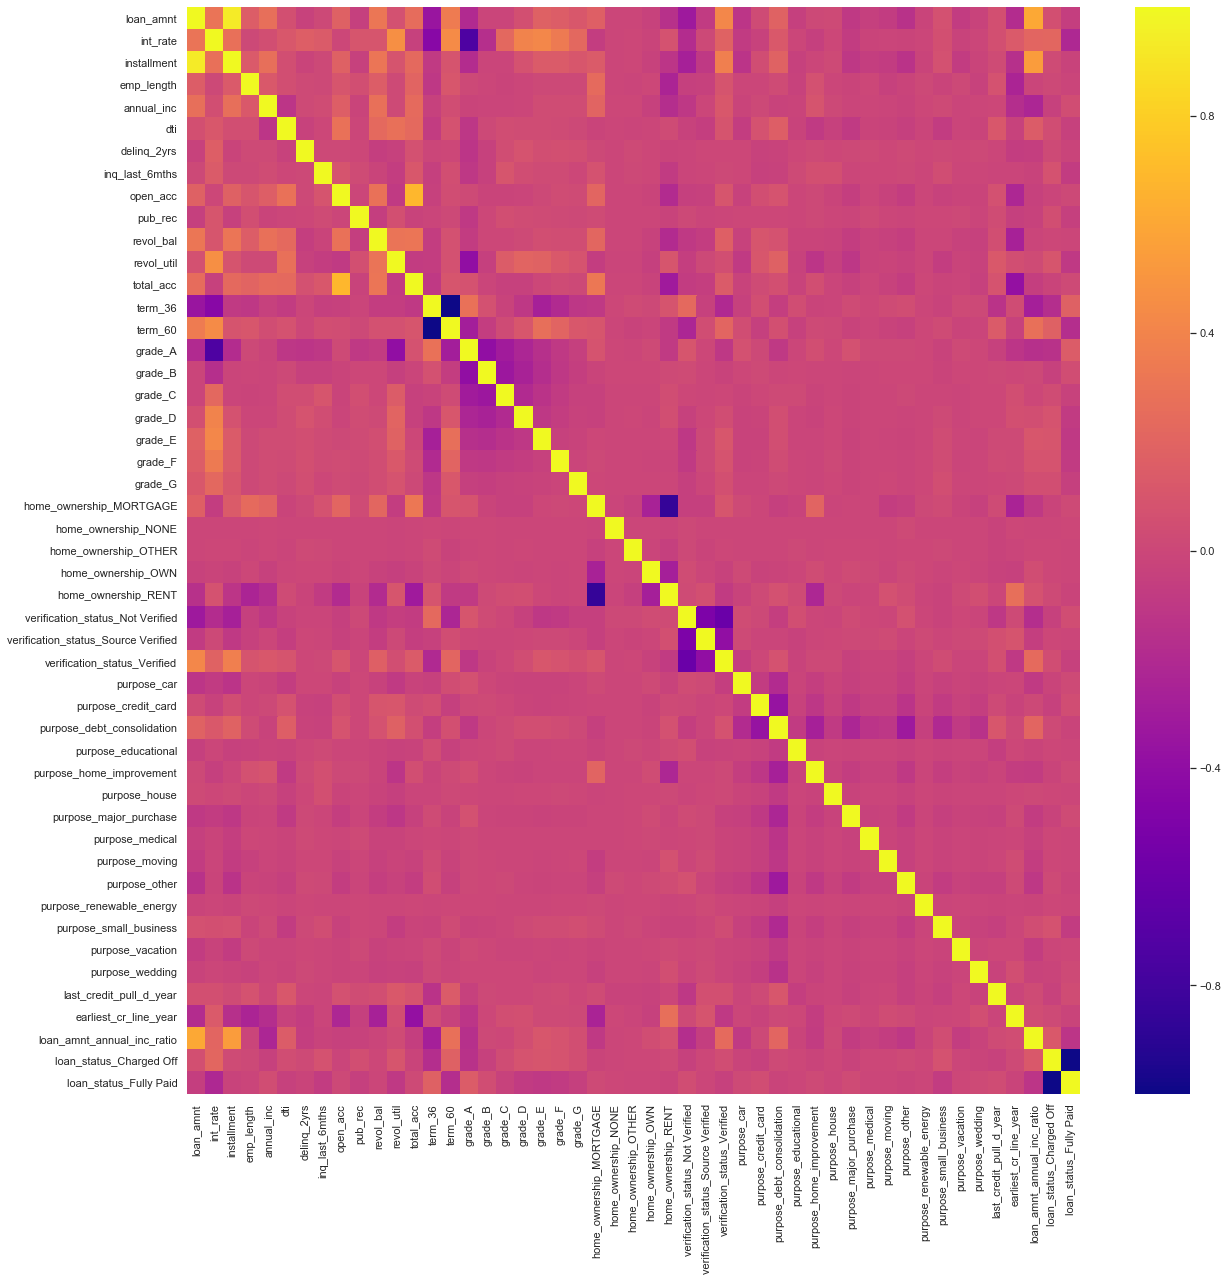

In [99]:
## Plotting heatmap of correlation between all the int/float columns of lending dataframe

plt.figure(figsize=(20, 20))
sns.heatmap(lending_df.corr(), cmap='plasma')

In [100]:
## List correlation values of loan_status_Charged Off w.r.t all the other int/float datatype columns and sort them in
## descending order of correlation values

lending_df.corr().loc['loan_status_Charged Off',:].sort_values(ascending=False)

loan_status_Charged Off                1.000000
int_rate                               0.211061
term_60                                0.173576
loan_amnt_annual_inc_ratio             0.118267
revol_util                             0.100102
grade_E                                0.094206
grade_F                                0.082213
grade_D                                0.082186
purpose_small_business                 0.077120
inq_last_6mths                         0.071713
loan_amnt                              0.059943
pub_rec                                0.051361
grade_G                                0.046919
dti                                    0.045166
verification_status_Verified           0.042482
grade_C                                0.037421
installment                            0.027651
home_ownership_RENT                    0.020855
earliest_cr_line_year                  0.020652
delinq_2yrs                            0.019986
purpose_debt_consolidation             0

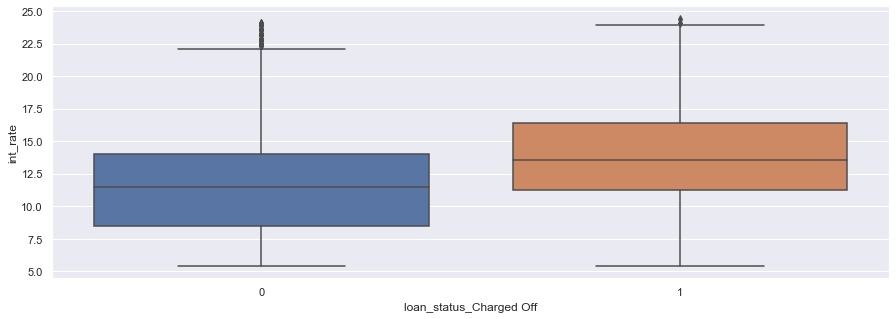

In [101]:
## Plotting distribution of int_rate 
## Top 1 +ve correlation

# sns.distplot(lending_df[lending_df['loan_status_Charged Off']==1]['int_rate'])
plt.figure(figsize=(15, 5))
sns.boxplot(y='int_rate', x='loan_status_Charged Off', data=lending_df)

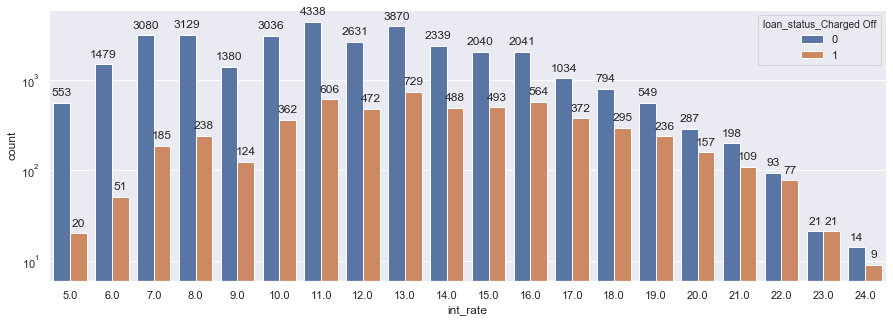

In [102]:
lending_df_int_rate = lending_df.copy()
lending_df_int_rate['int_rate'] = round(lending_df['int_rate'], 0)
plt.figure(figsize=(15, 5))
plt.yscale('log')
ax = sns.countplot(x='int_rate', hue='loan_status_Charged Off', data=lending_df_int_rate)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=12)
    
del lending_df_int_rate

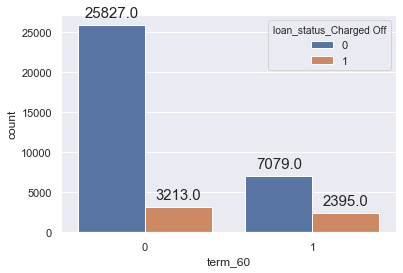

In [103]:
## Plotting countplot for all the combinations of 'term_60' and 'loan_status_Charged Off'
## Top 2 +ve correlation 

ax = sns.countplot(x='term_60', hue='loan_status_Charged Off', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

## NOTE: 0 value of term_60 refers to term_36

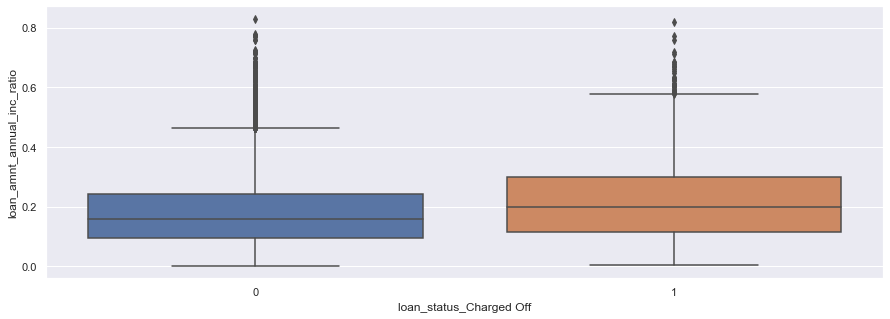

In [104]:
## Plotting distribution of loan_amnt_annual_inc_ratio when loan_status is 'Charged Off'
## Top 3 +ve correlation 

plt.figure(figsize=(15, 5))
sns.boxplot(x='loan_status_Charged Off', y='loan_amnt_annual_inc_ratio', data=lending_df)

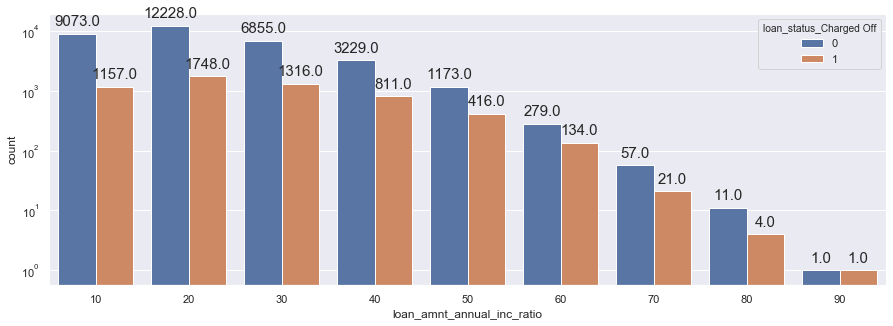

In [105]:
lending_df_loan_amount_annual_inc = lending_df.copy()
lending_df_loan_amount_annual_inc['loan_amnt_annual_inc_ratio'] = pd.cut(lending_df['loan_amnt_annual_inc_ratio'], bins=np.array(range(0, 91, 10))/100, labels=np.array(range(10, 91, 10)))

plt.figure(figsize=(15, 5))
plt.yscale('log')
ax = sns.countplot(x='loan_amnt_annual_inc_ratio', hue='loan_status_Charged Off', data=lending_df_loan_amount_annual_inc)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)
        
del lending_df_loan_amount_annual_inc

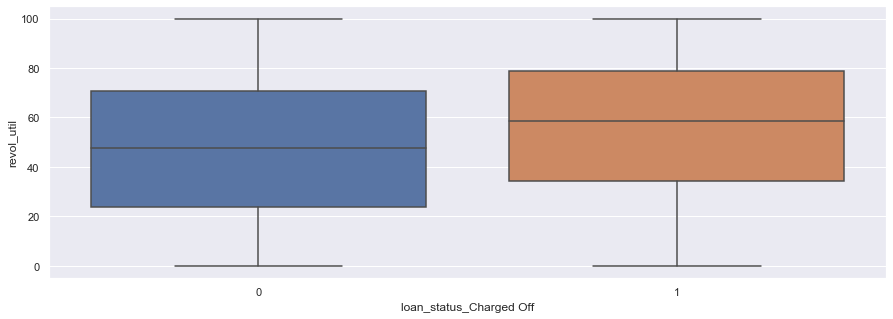

In [106]:
## Plotting distribution of revol_util when loan_status is 'Charged Off'
## Top 4 +ve correlation 

# sns.distplot(lending_df[lending_df['loan_status_Charged Off']==1]['revol_util'])
plt.figure(figsize=(15, 5))
sns.boxplot(y='revol_util', x='loan_status_Charged Off', data=lending_df)

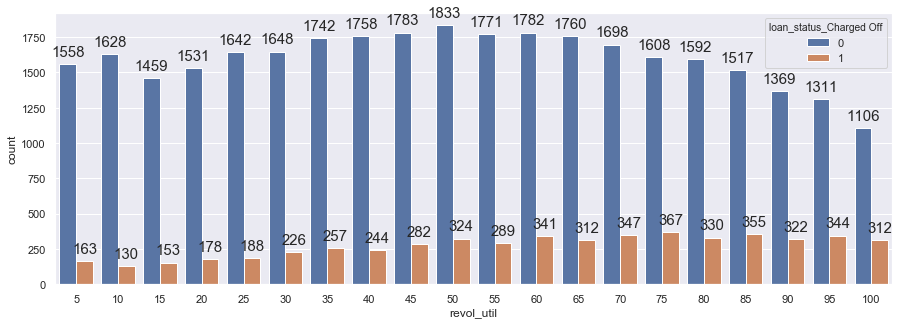

In [107]:
lending_df_revol_util = lending_df.copy()
lending_df_revol_util['revol_util'] = pd.cut(lending_df['revol_util'], bins=np.array(range(0, 101, 5)), labels=np.array(range(5, 101, 5)))

plt.figure(figsize=(15, 5))
# plt.yscale('log')
ax = sns.countplot(x='revol_util', hue='loan_status_Charged Off', data=lending_df_revol_util)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

del lending_df_revol_util

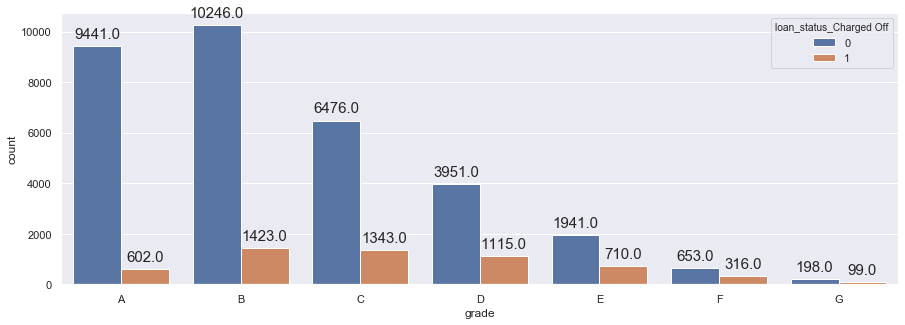

In [108]:
## Plotting countplot for all the combinations of 'grade' and 'loan_status_Charged Off' in log scale
## Grade A and Grade B is safe investment compared to other grades

fig, ax = plt.subplots(figsize=(15, 5))
# ax.set_yscale('log')
ax = sns.countplot(x='grade', hue='loan_status_Charged Off', data=lending_df.sort_values(['grade'], ascending=[True]), ax=ax)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

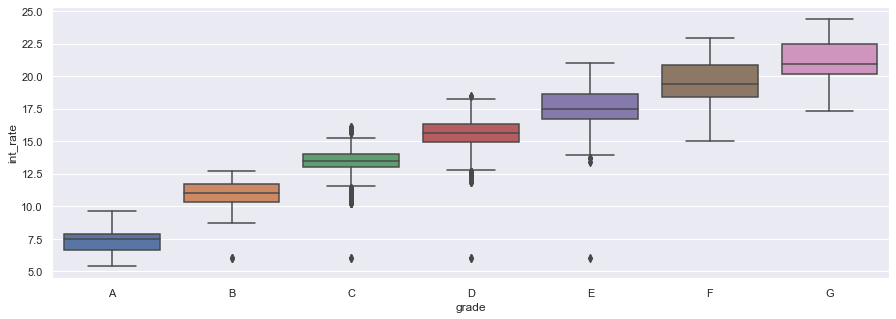

In [109]:
## Plotting boxplot for all the combinations of 'grade' and 'int_rate' in log scale
## Interest rate is increasing considerably as we go towards the right

plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='int_rate', data=lending_df.sort_values(['grade'], ascending=[True]))

In [110]:
lending_df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,purpose,addr_state,dti,delinq_2yrs,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,last_credit_pull_d_year,earliest_cr_line_year,loan_amnt_annual_inc_ratio,loan_status_Charged Off,loan_status_Fully Paid
0,5000,10.65,162.87,B,10,24000.0,credit_card,AZ,27.65,0,...,0,0,0,0,0,2016,1985,0.208333,0,1
1,2500,15.27,59.83,C,0,30000.0,car,GA,1.00,0,...,0,0,0,0,0,2013,1999,0.083333,1,0
2,2400,15.96,84.33,C,10,12252.0,small_business,IL,8.72,0,...,0,0,1,0,0,2016,2001,0.195886,0,1
3,10000,13.49,339.31,C,10,49200.0,other,CA,20.00,0,...,1,0,0,0,0,2016,1996,0.203252,0,1
5,5000,7.90,156.46,A,3,36000.0,wedding,AZ,11.20,0,...,0,0,0,0,1,2016,2004,0.138889,0,1


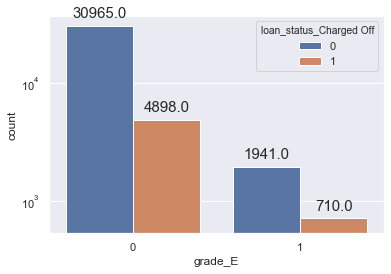

In [111]:
## Plotting countplot for all the combinations of 'grade_E' and 'loan_status_Charged Off' in log scale
## Top 5 +ve correlation 

fig, ax = plt.subplots()
ax.set_yscale('log')
ax = sns.countplot(x='grade_E', hue='loan_status_Charged Off', data=lending_df, ax=ax)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

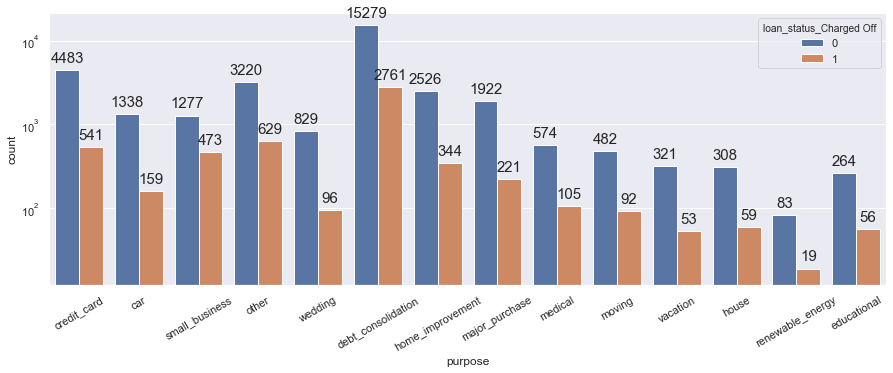

In [112]:
## Plotting countplot for all the combinations of 'purpose' and 'loan_status_Charged Off' in log scale
## Top 6 +ve correlation 

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
plt.yscale('log')
ax = sns.countplot(x='purpose', hue='loan_status_Charged Off', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

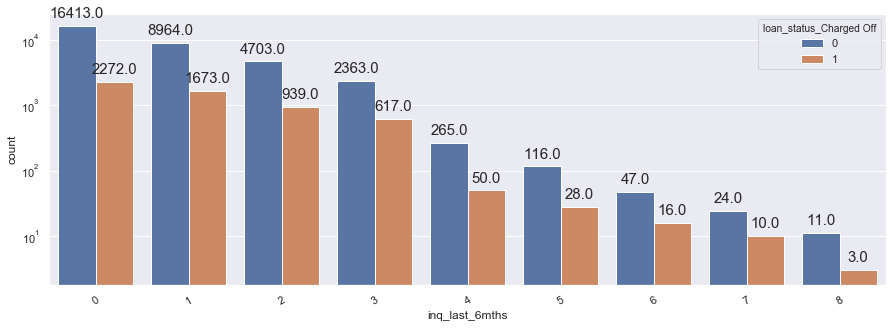

In [113]:
## Plotting countplot for all the combinations of 'inq_last_6mths' and 'loan_status_Charged Off' in log scale
## Top 7 +ve correlation 

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
plt.yscale('log')
ax = sns.countplot(x='inq_last_6mths', hue='loan_status_Charged Off', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

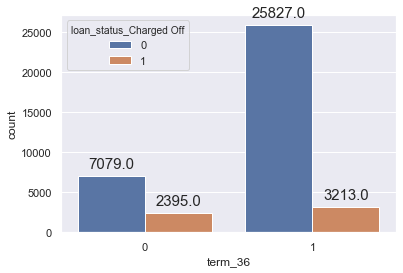

In [114]:
## Plotting countplot for all the combinations of 'term_36' and 'loan_status_Charged Off'
## Top 1 -ve correlation 

ax = sns.countplot(x='term_36', hue='loan_status_Charged Off', data=lending_df)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)

## NOTE: 0 value of term_36 refers to term_60

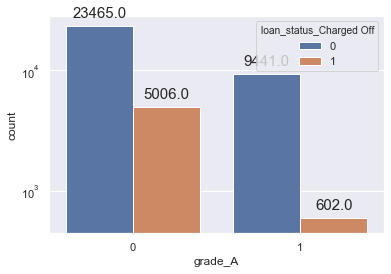

In [115]:
## Plotting countplot for all the combinations of 'grade_A' and 'loan_status_Charged Off' in log scale
## Top 2 -ve correlation 

fig, ax = plt.subplots()
ax.set_yscale('log')
g = sns.countplot(x='grade_A', hue='loan_status_Charged Off', data=lending_df, ax=ax)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x.mean(),y), ha='center', va='bottom', xytext = (0, 5), textcoords = 'offset points', fontsize=15)